**Classification of IMDB movies**

Importing IMDB dataset 

In [2]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

Inspecting first row of train data

In [ ]:
train_data[0]

Encoding the input integer sequences into binary matrix

In [7]:
import numpy as np
def vectorize_rows(rows,dimension=10000):
  results=np.zeros((len(rows),dimension),dtype='int')
  for i,row in enumerate(rows):
    results[i,row]=1
  return results
x_train=vectorize_rows(train_data)
x_test=vectorize_rows(test_data)

vectorizing the labels

In [8]:
y_train=np.asarray(train_labels).astype('int')
y_test=np.asarray(test_labels).astype('int')

Building the model

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [10]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

setting aside a validation set

In [12]:
x_val=x_train[:5000]
y_val=y_train[:5000]
partial_x_train=x_train[5000:]
partial_y_train=y_train[5000:]

Training the model

In [16]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
40/40 [==============================] - 2s 49ms/step - loss: 0.4816 - accuracy: 0.8137 - val_loss: 0.3538 - val_accuracy: 0.8788
Epoch 2/20
40/40 [==============================] - 2s 44ms/step - loss: 0.2782 - accuracy: 0.9093 - val_loss: 0.2876 - val_accuracy: 0.8916
Epoch 3/20
40/40 [==============================] - 2s 44ms/step - loss: 0.2107 - accuracy: 0.9287 - val_loss: 0.2739 - val_accuracy: 0.8912
Epoch 4/20
40/40 [==============================] - 2s 44ms/step - loss: 0.1697 - accuracy: 0.9416 - val_loss: 0.2749 - val_accuracy: 0.8920
Epoch 5/20
40/40 [==============================] - 2s 44ms/step - loss: 0.1417 - accuracy: 0.9525 - val_loss: 0.3138 - val_accuracy: 0.8786
Epoch 6/20
40/40 [==============================] - 2s 45ms/step - loss: 0.1229 - accuracy: 0.9595 - val_loss: 0.3092 - val_accuracy: 0.8866
Epoch 7/20
40/40 [==============================] - 2s 44ms/step - loss: 0.1032 - accuracy: 0.9674 - val_loss: 0.3162 - val_accuracy: 0.8878
Epoch 8/20
40

In [17]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting accuracy and loss

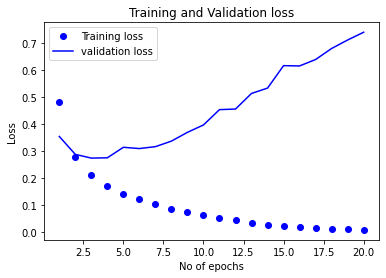

In [18]:
import matplotlib.pyplot as plt
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,21)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='validation loss')
plt.title("Training and Validation loss")
plt.xlabel('No of epochs')
plt.ylabel("Loss")
plt.legend()
plt.show()

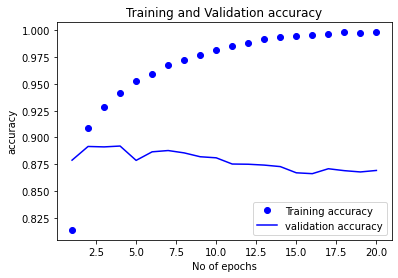

In [19]:
accuracy_values=history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
epochs=range(1,21)
plt.plot(epochs,accuracy_values,'bo',label='Training accuracy')
plt.plot(epochs,val_accuracy_values,'b',label='validation accuracy')
plt.title("Training and Validation accuracy")
plt.xlabel('No of epochs')
plt.ylabel("accuracy")
plt.legend()
plt.show()

from above accuracy and loss plots we can observe that after 4 epochs we cant observe any improvement in our validation loss and accuracy

lets train another model with 4 epochs

In [21]:
model2=models.Sequential()
model2.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model2.add(layers.Dense(16,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history2=model2.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/4
40/40 [==============================] - 2s 47ms/step - loss: 0.5339 - accuracy: 0.7709 - val_loss: 0.4089 - val_accuracy: 0.8538
Epoch 2/4
40/40 [==============================] - 2s 43ms/step - loss: 0.3111 - accuracy: 0.9005 - val_loss: 0.3091 - val_accuracy: 0.8800
Epoch 3/4
40/40 [==============================] - 2s 44ms/step - loss: 0.2217 - accuracy: 0.9249 - val_loss: 0.3179 - val_accuracy: 0.8740
Epoch 4/4
40/40 [==============================] - 2s 43ms/step - loss: 0.1759 - accuracy: 0.9395 - val_loss: 0.3273 - val_accuracy: 0.8738


lets predict x_test using both model and model2

In [23]:
y_pred=model.predict(x_test)
y_pred2=model2.predict(x_test)

In [31]:
y_pred_modified=y_pred>0.5
y_pred2_modified=y_pred2>0.5

confusion matrix and f1 score of both models

In [34]:
from sklearn.metrics import confusion_matrix,f1_score
print('confusion matrix and f1 score of first model\n',confusion_matrix(y_test,y_pred_modified),'\n',f1_score(y_test,y_pred_modified),'\n\n')
print('confusion matrix and f1 score of second model'+'\n',confusion_matrix(y_test,y_pred2_modified),'\n',f1_score(y_test,y_pred2_modified))

confusion matrix and f1 score of first model
 [[10846  1654]
 [ 2130 10370]] 
 0.8457021693035394 


confusion matrix and f1 score of second model
 [[ 9571  2929]
 [  577 11923]] 
 0.8718192453933898


from above we can observe that second model performs better than first model